<a href="https://colab.research.google.com/github/Randasabag/P10/blob/main/P10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sommaire :
**Partie 1 : Importation des données**
 - <a href="#C1">Importation des librairies</a>
 - <a href="#C2">Importation du jeu de données</a>
 
**Partie 2 : Analyse du jeu de données**
 - <a href="#C3">Affichage du nombre de lignes et colonnes</a>
 - <a href="#C4">Affichage des informations</a>
 - <a href="#C5">Analyse des doublons</a>
 - <a href="#C6">Analyse des valeurs manquantes</a>


**Partie 3 : Analyse univariée des variables**
 - <a href="#C7"></a>
 - <a href="#C8"></a>
 - <a href="#C9">Calcul de nouveaux indicateurs</a>
 - <a href="#C10">Indicateurs choisis</a>
 - <a href="#C11">margin_low="#C12">Ratio protéine animale/disponibilité protéine totale</a>
 - <a href="#C13">Taux d'importation / disponibilité intérieure</a>
 - <a href="#C14">PIB/Habitant</a>
 - <a href="#C15">Evolution de la Population 2007-2017</a>
 - <a href="#C16">Taux de production / disponibilité intérieure</a>
 - <a href="#C17">Indice de stabilité politique</a>


**Partie 4 : Analyse bivariée des indicateurs**
 - <a href="#C18">margin_low - Ratio protéine animale</a>
 - <a href="#C19">margin_low - Taux d'importation</a>
 - <a href="#C20">margin_low - Taux de Production</a>
 - <a href="#C21">Taux d'importation - Taux de Production</a>
 - <a href="#C22">Ratio protéine animale - Indice de stabilité politique</a>
 - <a href="#C23">Indice de stabilité politique - PIB par Habitant</a>

**Partie 5 : Classification** 
 - <a href="#C24">Classification Ascendante Hiérarchique (CAH)</a>
 - <a href="#C25">Analyse en Composantes Principales (PCA)</a>
 - <a href="#C26">K-Means</a>
 - <a href="#C27">Analyse en Composantes Principales (PCA)</a>

# **<font color='indianred'>Partie 1 : Importation des données</font>**

## <a name="C1"><font color='LightSeaGreen'>Importation des librairies</font></a>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import io
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## <a name="C2"><font color='LightSeaGreen'>Importation des données</font></a>

In [2]:
uploaded = files.upload()

Saving billets.xlsx to billets.xlsx


In [3]:
from google.colab import files
functions = files.upload()

Saving functions.py to functions.py


In [4]:
#Billets
df_billets=pd.read_excel(io.BytesIO(uploaded['billets.xlsx'])) 
df_billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


# **<font color='indianred'>Partie 2 : Analyse du jeu de données</font>**

## <a name="C3"><font color='LightSeaGreen'>Affichage du nombre de lignes et colonnes</font></a>

In [5]:
#nombre de lignes et colonnes
print('Billets',df_billets.shape)

Billets (1500, 7)


## <a name="C4"><font color='LightSeaGreen'>Affichage des informations</font></a>

In [6]:
print('Table billets')
df_billets.info()

Table billets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


###<font color='purple'>Changement des valeurs de la variable nature en 0 et 1</font>

In [7]:
df_billets=df_billets.replace({True : 1 , False : 0}).rename(columns={'is_genuine':'nature'})

In [8]:
#donner un nom aux billets
df_billets['code_billet']="b"+(df_billets.index).astype(str)
df_billets=df_billets.set_index('code_billet')
df_billets

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b0,1,171.81,104.86,104.95,4.52,2.89,112.83
b1,1,171.46,103.36,103.66,3.77,2.99,113.09
b2,1,172.69,104.48,103.50,4.40,2.94,113.16
b3,1,171.36,103.91,103.94,3.62,3.01,113.51
b4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
b1495,0,171.75,104.38,104.17,4.42,3.09,111.28
b1496,0,172.19,104.63,104.44,5.27,3.37,110.97
b1497,0,171.80,104.01,104.12,5.51,3.36,111.95


In [9]:
df_billets['nature'].value_counts()

1    1000
0     500
Name: nature, dtype: int64

Il y a 1000 vrais billets et 500 faux billets.

###<font color='purple'>Analyse statistique</font>

In [10]:
df_billets.describe()

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


## <a name="C7"><font color='LightSeaGreen'>Analyse des doublons</font></a>

In [11]:
#Fonction qui detecte les doublons
def detect_doublons(df):
    doub=df[df[df.columns].duplicated(subset=None, keep='first')]
    print('------------------') 
    print('La table contient', len(doub), 'doublons.')
    print(doub.shape)
    print('\n') 
    print(doub)
    print('\n')

In [12]:
detect_doublons(df_billets)

------------------
La table contient 0 doublons.
(0, 7)


Empty DataFrame
Columns: [nature, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []




## <a name="C5"><font color='LightSeaGreen'>Analyse des valeurs manquantes</font></a>

In [13]:
#Création d'une fonction calculant le pourcentage de valeurs manquantes 
#et affichant une heatmap pour visualiser les valeurs manquantes 
def val_manq(df):
    ligne,colonne=df.shape
    nb_cell=ligne*colonne
    nb_null=df.isnull().sum().sum()
    prct=nb_null *100/nb_cell
    print('Nombre de valeurs manquantes =',nb_null)
    print('Nombre de cellulles totales =',nb_cell)
    print('Pourcentage de valeurs manquantes = ',round(prct,2),'%') 
    print('\n')
    #print('Pourcentage de valeurs manquantes avec le nombre de colonnes =\n',(df.isna().sum()).value_counts(ascending=True))
    #Calcul des pourcentages de valeurs manquantes par variable(colonne)
    print('\n')
    print('Pourcentage de valeurs manquantes par variable/colonne =\n', 
          (df.isna().sum()).sort_values(ascending=True))
    print('\n')

In [14]:
val_manq(df_billets)

Nombre de valeurs manquantes = 37
Nombre de cellulles totales = 10500
Pourcentage de valeurs manquantes =  0.35 %




Pourcentage de valeurs manquantes par variable/colonne =
 nature           0
diagonal         0
height_left      0
height_right     0
margin_up        0
length           0
margin_low      37
dtype: int64




###<font color='purple'>Imputation par la moyenne</font>

In [15]:
#calcul de la moyenne de la variable margin_low
#moyenne_marge_bas=round(df_billets['margin_low'].mean(),2)
#moyenne_marge_bas

In [16]:
#lignes où il y a au moins une valeur nulle
df_billets[df_billets.isnull().any(axis=1)].head()

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b72,1,171.94,103.89,103.45,NaN,3.25,112.79
b99,1,171.93,104.07,104.18,NaN,3.14,113.08
b151,1,172.07,103.80,104.38,NaN,3.02,112.93
b197,1,171.45,103.66,103.80,NaN,3.62,113.27
b241,1,171.83,104.14,104.06,NaN,3.02,112.36


In [17]:
#remplacement des valeurs nulles par la moyenne de margin_low
#df_billets=df_billets.fillna(moyenne_marge_bas)

# **<font color='indianred'>Partie 3 : Analyse univariée des variables</font>**

## <a name="C11"><font color='LightSeaGreen'>diagonal</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

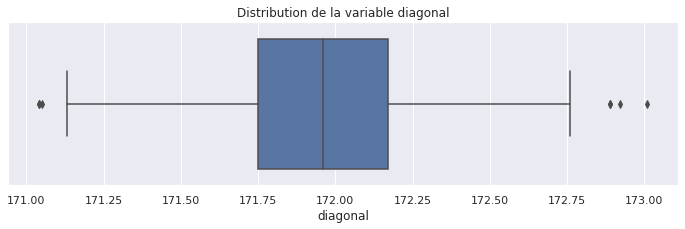

In [18]:
#Représentation la variable diagonal sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["diagonal"], color="b")
plt.title('Distribution de la variable diagonal')
plt.savefig("distribution_diagonal_boxplot.png")
plt.show

In [19]:
#détecte les outliers et les filtre pour avoir un nouveau dataframe sans outliers
def liste_outliers(df, colonne):
  #1er quartile
  q1 = df[colonne].quantile(0.25)
  #3eme quartile
  q3 = df[colonne].quantile(0.75)
  #écart interquatile
  iqr = q3 - q1
  print('Ecart interquatile =', round(iqr,2))
  seuil_min = q1 -(1.5 * iqr) 
  seuil_max = q3 +(1.5 * iqr)
  print('Seuil minimum =', round(seuil_min,2))
  print('Seuil maximum =', round(seuil_max,2))

  #dataframe des outliers
  dfo = df[(df[colonne] < seuil_min) | (df[colonne] > seuil_max)]
  #liste des outliers
  liste_out=(dfo[colonne].tolist())
  print('Nombre doutliers:', len(liste_out))
  print('Liste des outliers :', liste_out)
  print('\n')

In [20]:
#affichage des outliers 
liste_outliers(df_billets, 'diagonal')

Ecart interquatile = 0.42
Seuil minimum = 171.12
Seuil maximum = 172.8
Nombre doutliers: 7
Liste des outliers : [171.04, 172.92, 172.89, 172.89, 171.04, 173.01, 171.05]




In [21]:
l=[171.04, 172.92, 172.89, 172.89, 171.04, 173.01, 171.05]
df_billets[df_billets['diagonal'].isin (l)].sort_values('diagonal')

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b729,1,171.04,103.84,103.64,4.22,3.36,112.70
b1142,0,171.04,104.23,104.22,4.87,3.56,111.54
b1388,0,171.05,104.09,104.50,4.72,3.10,112.44
b842,1,172.89,103.77,104.24,4.12,3.01,113.72
b1022,0,172.89,104.03,104.03,6.03,3.00,110.95
b828,1,172.92,103.55,103.94,4.78,3.27,113.55
b1277,0,173.01,104.59,104.31,5.04,3.05,110.91


In [22]:
#df_outdiag=df_billets[df_billets['diagonal'].isin (l)]
#df_outdiag[['nature', 'diagonal']].sort_values('diagonal')

On trouve 7 outliers pour la variable diagonal dont 3 vrais billets et 4 faux billets.

## <a name="C11"><font color='LightSeaGreen'>height_left</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

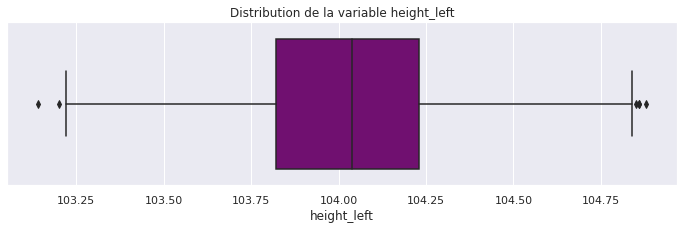

In [23]:
#Représentation la variable height_left sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["height_left"], color="purple")
plt.title('Distribution de la variable height_left')
plt.savefig("distribution_height_left_boxplot.png")
plt.show

In [24]:
#affichage des outliers 
liste_outliers(df_billets, 'height_left')

Ecart interquatile = 0.41
Seuil minimum = 103.2
Seuil maximum = 104.85
Nombre doutliers: 6
Liste des outliers : [104.86, 103.2, 103.14, 104.88, 104.86, 104.85]




In [25]:
l=[104.86, 103.2, 103.14, 104.88, 104.86, 104.85]
df_billets[df_billets['height_left'].isin (l)].sort_values('height_left')

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b292,1,172.09,103.14,103.81,4.88,3.01,113.69
b224,1,172.12,103.20,103.92,4.46,3.26,113.44
b1382,0,171.97,104.85,104.52,5.87,3.56,110.98
b0,1,171.81,104.86,104.95,4.52,2.89,112.83
b1150,0,171.79,104.86,104.34,5.39,3.14,113.02
b1090,0,172.11,104.88,104.10,4.80,3.73,110.78


On trouve 6 outliers pour la variable height_left dont 3 vrais billets et 3 faux billets.

## <a name="C11"><font color='LightSeaGreen'>height_right</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

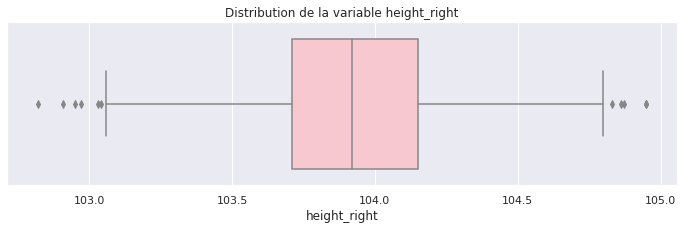

In [26]:
#Représentation la variable height_right sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["height_right"], color="pink")
plt.title('Distribution de la variable height_right')
plt.savefig("distribution_height_right_boxplot.png")
plt.show

In [27]:
#affichage des outliers 
liste_outliers(df_billets, 'height_right')

Ecart interquatile = 0.44
Seuil minimum = 103.05
Seuil maximum = 104.81
Nombre doutliers: 11
Liste des outliers : [104.95, 103.03, 102.97, 102.95, 102.82, 102.91, 103.04, 104.87, 104.86, 104.83, 104.95]




In [28]:
l=[104.95, 103.03, 102.97, 102.95, 102.82, 102.91, 103.04, 104.87, 104.86, 104.83, 104.95]
df_billets[df_billets['height_right'].isin (l)].sort_values('height_right')

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b251,1,171.80,103.26,102.82,NaN,2.95,113.22
b522,1,172.02,104.42,102.91,3.86,3.12,113.43
b193,1,172.35,103.73,102.95,4.49,3.37,112.49
b176,1,171.75,103.63,102.97,4.46,2.77,113.22
b77,1,171.84,104.09,103.03,4.11,2.77,113.18
b761,1,172.16,103.93,103.04,4.14,2.99,113.26
b1331,0,172.32,104.60,104.83,4.84,3.51,112.55
b1321,0,172.29,104.72,104.86,5.71,3.16,112.15
b1199,0,172.03,104.32,104.87,4.49,3.77,111.04


Il y a 11 outliers pour la variable height_right dont 7 vrais billets et 4 faux billets.

## <a name="C11"><font color='LightSeaGreen'>margin_low</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

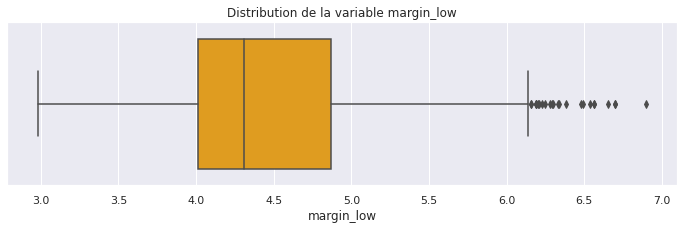

In [29]:
#Représentation la variable margin_low sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["margin_low"], color="orange")
plt.title('Distribution de la variable margin_low')
plt.savefig("distribution_margin_low_boxplot.png")
plt.show

In [30]:
#affichage des outliers 
liste_outliers(df_billets, 'margin_low')

Ecart interquatile = 0.86
Seuil minimum = 2.73
Seuil maximum = 6.15
Nombre doutliers: 24
Liste des outliers : [6.2, 6.7, 6.33, 6.65, 6.21, 6.23, 6.3, 6.56, 6.7, 6.16, 6.34, 6.48, 6.49, 6.9, 6.19, 6.16, 6.28, 6.19, 6.38, 6.25, 6.56, 6.19, 6.54, 6.29]




In [31]:
l=[6.2, 6.7, 6.33, 6.65, 6.21, 6.23, 6.3, 6.56, 6.7, 6.16, 6.34, 6.48, 6.11, 6.14, 6.49, 6.9, 6.19, 6.16, 6.28, 6.19, 6.38, 6.25, 6.56, 6.19, 6.54, 6.29]
df_billets[df_billets['margin_low'].isin (l)].sort_values('margin_low')

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b1226,0,171.60,103.90,104.29,6.11,3.55,110.77
b1244,0,171.91,103.80,103.99,6.14,3.32,110.78
b1345,0,171.56,104.17,103.87,6.16,3.38,111.55
b1133,0,171.79,103.99,103.67,6.16,3.52,110.93
b1459,0,171.78,104.31,103.82,6.19,3.25,111.14
b1353,0,171.61,104.04,104.06,6.19,3.08,110.73
b1322,0,172.07,104.50,104.23,6.19,3.07,111.21
b1023,0,172.02,104.26,104.20,6.20,3.58,111.25
b1053,0,171.85,104.52,104.05,6.21,3.43,111.96


On trouve 26 outliers pour la variable margin_low qui sont tous de faux billets.

## <a name="C11"><font color='LightSeaGreen'>margin_up</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

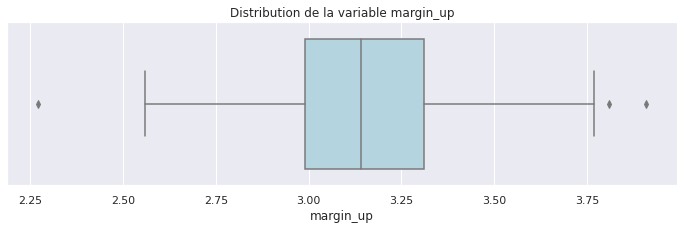

In [32]:
#Représentation la variable margin_up sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["margin_up"], color="lightblue")
plt.title('Distribution de la variable margin_up')
plt.savefig("distribution_margin_up_boxplot.png")
plt.show

In [33]:
#affichage des outliers 
liste_outliers(df_billets, 'margin_up')

Ecart interquatile = 0.32
Seuil minimum = 2.51
Seuil maximum = 3.79
Nombre doutliers: 3
Liste des outliers : [2.27, 3.91, 3.81]




In [34]:
l=[2.27, 3.91, 3.81]
df_billets[df_billets['margin_up'].isin (l)].sort_values('margin_up')

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b664,1,172.05,103.70,103.75,5.04,2.27,113.55
b1270,0,171.26,104.22,104.07,4.78,3.81,112.88
b1029,0,171.96,104.29,104.03,6.01,3.91,110.83


On voit 3 outliers pour la variable margin_up dont 1 vrai billet et 2 faux billets.

## <a name="C11"><font color='LightSeaGreen'>length</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

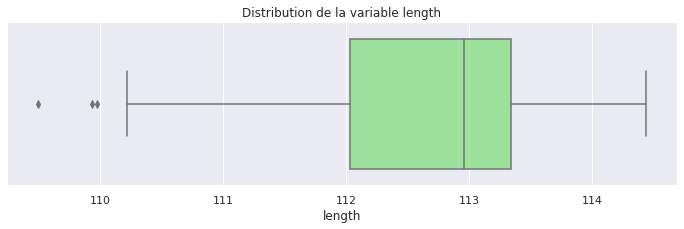

In [35]:
#Représentation la variable length sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["length"], color="lightgreen")
plt.title('Distribution de la variable length')
plt.savefig("distribution_length_boxplot.png")
plt.show

In [36]:
#affichage des outliers 
liste_outliers(df_billets, 'length')

Ecart interquatile = 1.31
Seuil minimum = 110.06
Seuil maximum = 115.3
Nombre doutliers: 3
Liste des outliers : [109.49, 109.97, 109.93]




In [37]:
l=[109.49, 109.97, 109.93]
df_billets[df_billets['length'].isin (l)].sort_values('length')

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b1082,0,171.75,103.96,103.83,5.39,3.54,109.49
b1453,0,171.55,104.20,104.49,5.42,3.54,109.93
b1355,0,171.68,103.89,103.70,5.97,3.03,109.97


On voit 3 outliers pour la variable length qui sont tous de faux billets.

# **<font color='indianred'>Partie 4 : Analyse bivariée des variables</font>**

## <a name="C23"><font color='LightSeaGreen'>Matrice de corrélation</font></a>

In [61]:
variables=['diagonal','height_left','height_right','margin_low','margin_up','length']

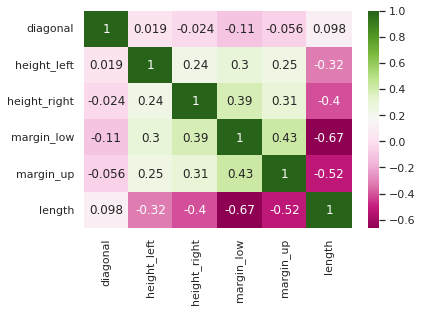

In [88]:
matrix = df_billets[variables].corr()
sns.heatmap(data=matrix, annot=True, cmap='PiYG');

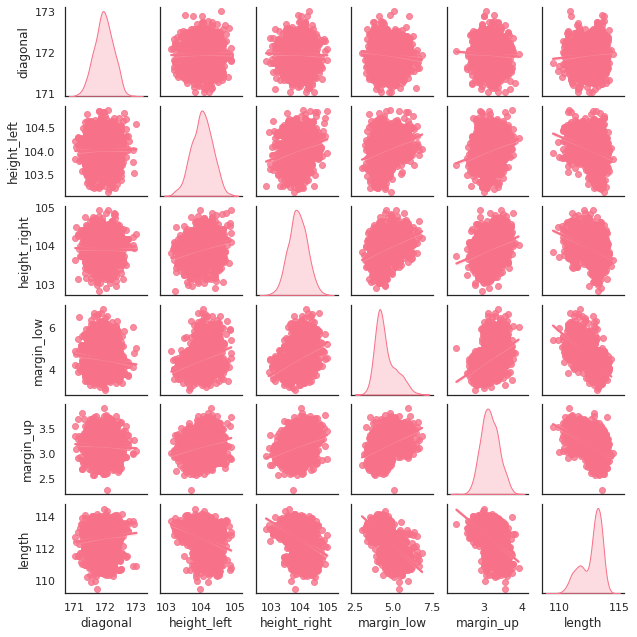

In [62]:
#Visualisation
#sns.pairplot(df_billets, x_vars=['diagonal','height_left','height_right','margin_low','margin_up','length'], y_vars='nature', kind='reg')
sns.pairplot(df_billets, diag_kind="kde",height=1.5, x_vars=variables, y_vars=variables, kind='reg')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


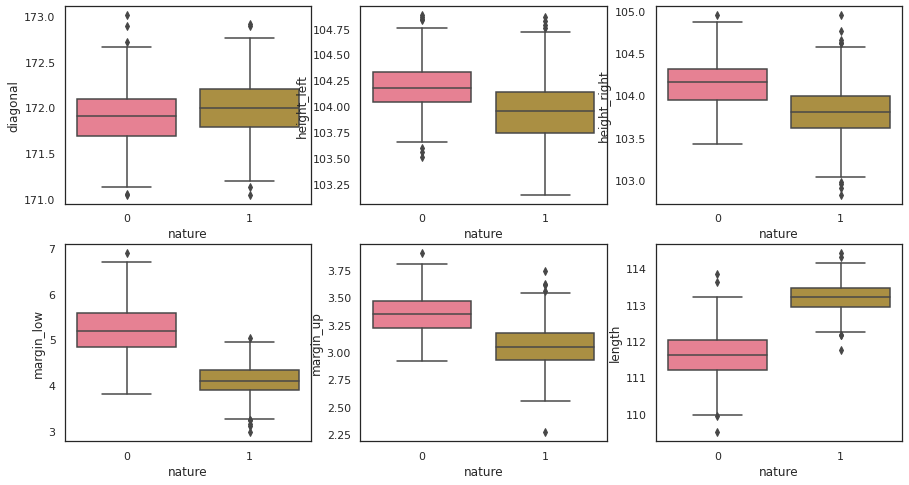

In [39]:
#Comparaison visuelle des clusters par boxplot
plt.figure(figsize=(15, 8))
sns.set(style="white", palette="husl")
plt.subplot(2, 3, 1)

plt.subplot(231)
sns.boxplot(data=df_billets, x='nature', y='diagonal')

plt.subplot(232)
sns.boxplot(data=df_billets, x='nature', y='height_left')

plt.subplot(233)
sns.boxplot(data=df_billets, x='nature', y='height_right')

plt.subplot(234)
sns.boxplot(data=df_billets, x='nature', y='margin_low')

plt.subplot(235)
sns.boxplot(data=df_billets, x='nature', y='margin_up')

plt.subplot(236)
sns.boxplot(data=df_billets, x='nature', y='length')

plt.savefig("boxplots.png")
plt.show()

In [50]:
#df_billets[['nature', 'margin_low']].grouby('nature', as_index=False)
#df_prix_cat=df_transcl[['categ', 'price']].groupby('categ', as_index=False).count()
df_billets[['nature', 'margin_low']].groupby(['nature'], as_index=False).count()

,nature,margin_low
0,0,492
1,1,971


Il y a 8 valeurs manquantes parmi les faux billets et 29 valeurs manquantes parmi les vrais billets.

Régression Linéaire

In [77]:
reg_multi = smf.ols('nature~diagonal+height_left+height_right+margin_low+margin_up+length', data=df_billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                 nature   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1322.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:57:00   Log-Likelihood:                 384.34
No. Observations:                1463   AIC:                            -754.7
Df Residuals:                    1456   BIC:                            -717.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.2646      3.753     -3.268   

In [80]:
df_full = df_billets.dropna(inplace=False)
df_billets.corr()

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
nature,1.000000,0.132756,-0.379833,-0.485092,-0.783032,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


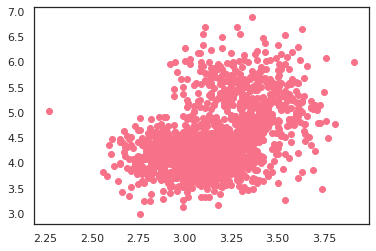

In [100]:
plt.scatter(df_full['margin_up'], df_full['margin_low'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


Score R2 : 0.18628380252698062
Racine carrée de l’erreur quadratique moyenne (RMSE) : 0.5985955875033656


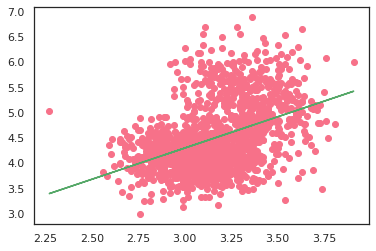

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = df_full['margin_up'][:, np.newaxis]
y = df_full['margin_low'][:, np.newaxis]

model = LinearRegression()

model.fit(x,y)
y_predict = model.predict(x)
print('Score R2 :', model.score(x,y))

rmse_linear = np.sqrt(mean_squared_error(y,y_predict))
print('Racine carrée de l’erreur quadratique moyenne (RMSE) :', rmse_linear)

plt.scatter(x, y)
plt.plot(x, y_predict, color='g')
plt.show()

In [65]:
features_cols=variables
X=df_billets[variables]
X.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,
b0,171.81,104.86,104.95,4.52,2.89,112.83
b1,171.46,103.36,103.66,3.77,2.99,113.09
b2,172.69,104.48,103.50,4.40,2.94,113.16
b3,171.36,103.91,103.94,3.62,3.01,113.51
b4,171.73,104.28,103.46,4.04,3.48,112.54


In [68]:
#variable cible
y=df_billets['nature']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [74]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train, y_train)

ValueError: ignored

## <a name="C26"><font color='LightSeaGreen'>K-Means</font></a>

###<font color='purple'>Centrage et Réduction</font>

In [40]:
from sklearn import decomposition, preprocessing
# préparation des données pour le clustering
X = df_billets 
billets = df_billets.index
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

###<font color='purple'>Coefficient de silhouette</font>

In [41]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

#Liste pour stocker nos coefficients
silhouettes = [] 

#Boucle itérative de 2 à 10 clusters pour tester toutes les possibilités de k
for k in range(2, 10): 
    #Création et ajustement d'un modèle pour chaque k
    cls = KMeans(n_clusters=k)  
    cls.fit(X_scaled)
    
    #Stockage des coefficients associés
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)
    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.plot(range(2, 10), silhouettes, marker='o')
plt.savefig('silhouette.png')
plt.show()

ValueError: ignored

Le coefficient de silhouette nous indique une valeur de k=5.

###<font color='purple'>Méthode du coude</font>

In [ ]:
#Méthode du coude
#On crée une liste dans laquelle on stocke les inerties
inerties=[]

#On fait une boucle de 2 à 9 pour tester toutes ces possibiliéts
for k in range(2, 10):
    #pour chaque k, on crée un modèle et on l’ajuste
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    #on stocke l’inertie associée
    inerties.append(km.inertia_)

#Visualisation des valeurs d'inertie pour chaque nombre de cluster
plt.plot(range(2, 10), inerties, marker='o')

plt.savefig('coude.png')
plt.show()

Pas d'indication particulière sur le nombre de clusters à choisir

###<font color='purple'>Algorithme du Kmeans</font>

In [ ]:
#Algorithme du Kmeans 
from sklearn.cluster import KMeans

# Création du modèle k-means 
kmeans = KMeans(n_clusters=2, n_init=20, init='k-means++', random_state=1)
kmeans.fit(X_scaled)

# Détermine à quel cluster appartient chaque point (kmeans.labels_)
clusters =  kmeans.predict(X_scaled)
clusters

In [ ]:
#nombre d'individus (pays) dans chaque cluster
import numpy
numpy.unique(kmeans.labels_, return_counts=True)

###<font color='purple'>Ajout de la colonne numéro de cluster </font>

In [ ]:
#Ajout d'une nouvelle colonne qui affecte à chaque pays un numéro de cluster
df_km=df_billets.copy()
df_km['nocl'] = kmeans.labels_
df_km

In [ ]:
df_km=df_km.reset_index()

###<font color='purple'>Affichage des pays de chaque cluster</font>

In [ ]:
#Dataframe de chaque cluster
clusterkm0=df_km[df_km['nocl']==0]
clusterkm1=df_km[df_km['nocl']==1]
clusterkm2=df_km[df_km['nocl']==2]
clusterkm3=df_km[df_km['nocl']==3]
clusterkm4=df_km[df_km['nocl']==4]
clusterkm1.head()

In [ ]:
print('Cluster 0 :', 'Nombre de billets:', len(clusterkm0), clusterkm0.index.unique())
print('Cluster 1 :', 'Nombre de billets:', len(clusterkm1), clusterkm1.index.unique())

###<font color='purple'>Visualisation des clusters par variable</font>

In [ ]:
#Comparaison visuelle des clusters par boxplot
plt.figure(figsize=(25, 15))
sns.set(style="whitegrid")
plt.subplot(2, 3, 1)

plt.subplot(231)
sns.boxplot(data=df_km, x='nocl', y='diagonal')

plt.subplot(232)
sns.boxplot(data=df_km, x='nocl', y='height_left')

plt.subplot(233)
sns.boxplot(data=df_km, x='nocl', y='height_right')

plt.subplot(234)
sns.boxplot(data=df_km, x='nocl', y='margin_low')

plt.subplot(235)
sns.boxplot(data=df_km, x='nocl', y='margin_up')

plt.subplot(236)
sns.boxplot(data=df_km, x='nocl', y='length')

plt.savefig("boxplots.png")
plt.show()

Caractéristiques des VRAIS / FAUX BILLETS :
*   Les *faux* billets ont une ***hauteur*** (droite/gauche) et une ***marge*** (bas/haut) plus **grandes** que les vrais billets
*   Les *faux* billets ont une **longueur** plus **petite** que celles des *vrais* billets
*   Les *faux* billets ont une **diagonale** un peu plus petite que celles des *vrais* billets


###<font color='purple'>Centroides</font>

In [ ]:
#Centroïdes des 5 clusters dans la forme centrée réduite
centroids = kmeans.cluster_centers_
df_cent=pd.DataFrame(centroids, columns=df_billets.columns).round(decimals = 2) 
df_cent

###<font color='purple'>ClusterMap</font>

In [ ]:
#Clustermap entre clusters et variables
sns.clustermap(df_cent, figsize=(10, 6), annot=True, standard_scale=1, cmap='Blues')
plt.savefig("clustermap.png")
plt.show()

## <a name="C27"><font color='LightSeaGreen'>Analyse en Composantes Principales (PCA)</font></a>

###<font color='purple'>Visualisation des clusters et variables sur un plan à 2 dimensions</font>

In [ ]:
#df_billets=df_billets[['diagonal','height_left','height_right','margin_low','margin_up','length']]

In [ ]:
from sklearn.decomposition import PCA
from sklearn import decomposition, preprocessing

n_comp=4

# Création du PCA pour réduire les données à 2 dimensions pour la visualisation
pca = PCA(n_components=n_comp)
pca.fit(X_scaled)

# Cercle des corrélations
from functions import display_circles
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(df_billets.columns))

# Projection des individus (nouvel espace vectoriel)
X_projected = pca.transform(X_scaled)

# Affiche un scatter plot des points des data dans le nouvel espace vectoriel
from functions import display_factorial_planes
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], labels=None, illustrative_var = clusters, alpha = 0.8)

# Eboulis des valeurs propres
from functions import display_scree_plot
display_scree_plot(pca)

plt.savefig("PCA.png")
plt.show()

In [ ]:
#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(pca.explained_variance_ratio_.cumsum())

2 composantes sont suffisantes pour avoir au moins 60% de la variance.

###<font color='purple'>Projection des billets en 2 clusters sur F1 et F2</font>

In [ ]:
#Coordonnées factorielles 
plt.figure(figsize=(40, 15))
plt.subplot(121)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=kmeans.labels_, cmap='plasma')
for i,(x,y) in enumerate(X_projected[:,[0,1]]):
                    plt.text(x, y, df_billets.index[i], fontsize='13') 
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 5 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))
plt.legend()
plt.savefig("projection_clusters.png")
plt.show()

###<font color='purple'>Calcul des composantes F1 et F2</font>

In [ ]:
#Composantes F1 et F2 : coordonnées des pays sur l'espace vectoriel à 2 dimensions
df_comp_km = pd.DataFrame(X_projected, index=df_billets.index, columns=["F" + str(i+1) for i in range(4)]).iloc[:, :2].round (decimals = 2)
df_comp_km.head()

# **<font color='indianred'>Partie 5 : Classification Supervisée</font>**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
y = df_billets['nature']
X = df_billets.drop('nature', axis=1)

In [ ]:
y

In [ ]:
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation

In [ ]:
#fonction (diagonal	height_left	height_right	margin_low	margin_up	length)
def nature_billet(model, diagonal=175, height_left=104, height_right=103, margin_low=4.5, margin_up=3, length=112):
  x = np.array([diagonal, height_left, height_right, margin_low, margin_up, length]).reshape(1, 6)
  print(model.predict(x))
  print(model.predict_proba(x))

In [ ]:
nature_billet(model)